In [1]:
import os
import mido
import numpy as np
import matplotlib.pyplot as plt
from data.data_utils import read_txt_by_line, extract_as_clip
from data.data_utils import maestro_get_tempo, maestro_get_tick_per_second
from data.data_utils import maestro_remove_cc, maestro_batch_remove_cc_and_save
from data.data_utils import NoteInt, ConcurrentNotesInt
from data.data_utils import maestro_midi_to_note_list, maestro_note_list_to_piano_roll, maestro_piano_roll_to_note_list
from data.data_utils import get_concurrent_notes_from_piano_roll, maestro_concurrent_notes_to_piano_roll
from data.data_utils import remove_short_notes
from data.data_utils import MAESTRO_TICK_PER_SEC

In [2]:
test_piece_name = "all_notes_synth"
test_midi_path = os.path.join("data", "synth", test_piece_name+".mid")
test_wav_path = os.path.join("data", "synth", test_piece_name+".wav")

# test_piece_name = "MIDI-Unprocessed_SMF_02_R1_2004_01-05_ORIG_MID--AUDIO_02_R1_2004_05_Track05_wav"
# test_midi_path = os.path.join("midi_no_cc", "2004", test_piece_name+".midi")
# test_wav_path = os.path.join("synth", "2004", test_piece_name+".wav")

This is a demo tutorial on using data_utils.py, and it is helpful for users to construct the data environment of this project :)

# Optional: dataset construction
## Read concatenated wav (generated by REAPER) and extract by clips

## Remove CC for MAESTRO dataset
This tutorial https://medium.com/analytics-vidhya/convert-midi-file-to-numpy-array-in-python-7d00531890c is a good intro for using mido to parse midi

# Optional: create single-chord hf5s dataset and create json note templates

# Tutorial: Midi to piano roll

In [3]:
# example on the midis to read
test_midi = mido.MidiFile(test_midi_path, ticks_per_beat=480)
tempo = maestro_get_tempo(test_midi)
ticks_per_beat = test_midi.ticks_per_beat
tick_per_second = maestro_get_tick_per_second(test_midi)

print(len(test_midi.tracks))
print(test_midi.tracks[0])
print(test_midi.tracks[1][:10])
print(1e6 / tempo, "bps, ", ticks_per_beat, "tick/beat, ", tick_per_second, "tick/sec")

2
MidiTrack([
  MetaMessage('track_name', name='all_notes_synth', time=0),
  MetaMessage('time_signature', numerator=4, denominator=4, clocks_per_click=24, notated_32nd_notes_per_beat=8, time=0),
  MetaMessage('set_tempo', tempo=500000, time=0),
  MetaMessage('end_of_track', time=0)])
MidiTrack([
  Message('note_on', channel=0, note=21, velocity=102, time=0),
  Message('note_off', channel=0, note=21, velocity=0, time=480),
  Message('note_on', channel=0, note=22, velocity=102, time=480),
  Message('note_off', channel=0, note=22, velocity=0, time=480),
  Message('note_on', channel=0, note=23, velocity=102, time=480),
  Message('note_off', channel=0, note=23, velocity=0, time=480),
  Message('note_on', channel=0, note=24, velocity=102, time=480),
  Message('note_off', channel=0, note=24, velocity=0, time=480),
  Message('note_on', channel=0, note=25, velocity=102, time=480),
  Message('note_off', channel=0, note=25, velocity=0, time=480)])
2.0 bps,  480 tick/beat,  960 tick/sec


In [4]:
note_test = NoteInt(pitch = 64, onset = 10, velocity = 60)
note_test.offset = 30
note_test

NoteInt(pitch=64, velocity=60, onset=10, offset=30)

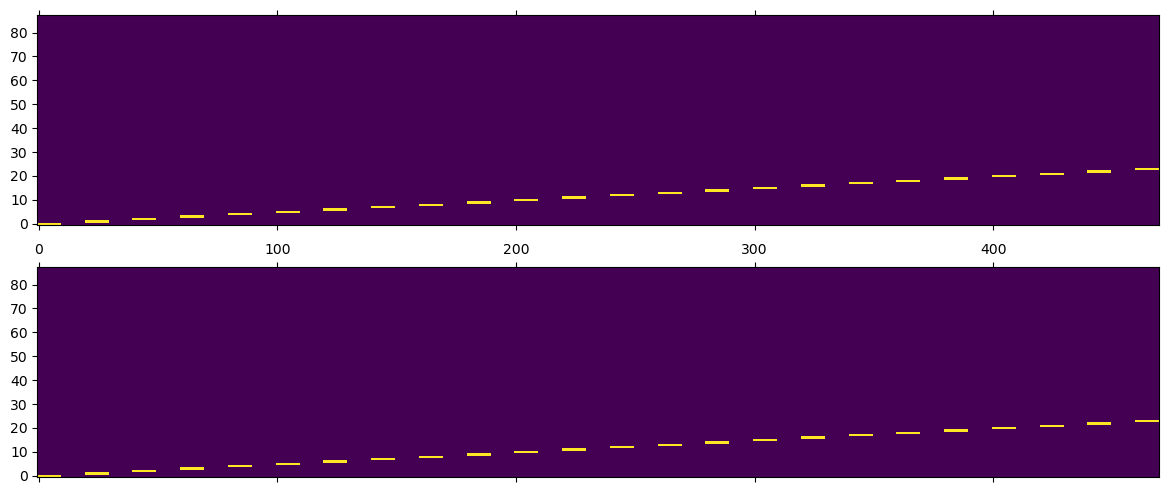

In [5]:
demo_end_id = MAESTRO_TICK_PER_SEC * 24
demo_interval = int(MAESTRO_TICK_PER_SEC/20)

fig, ax = plt.subplots(2,1, figsize=(16,6), sharex = True)
test_note_list = maestro_midi_to_note_list(test_midi)
test_note_list = remove_short_notes(test_note_list, min_len = 20)
test_piano_roll = maestro_note_list_to_piano_roll(test_note_list, pitch_range = 88, lowest_pitch = 21)
ax[0].matshow(test_piano_roll[:demo_end_id:demo_interval,:].T, origin = "lower")

test_note_list_recon = maestro_piano_roll_to_note_list(test_piano_roll[:demo_end_id], lowest_pitch = 21)
test_piano_roll_recon = maestro_note_list_to_piano_roll(test_note_list_recon, pitch_range = 88, lowest_pitch = 21)
ax[1].matshow(test_piano_roll_recon[:demo_end_id:demo_interval,:].T, origin = "lower")

In [6]:
for item in list(zip(test_note_list[:10], test_note_list_recon[:10])):
    print(item)

(NoteInt(pitch=21, velocity=102, onset=0, offset=480), NoteInt(pitch=21, velocity=102, onset=0, offset=480))
(NoteInt(pitch=22, velocity=102, onset=960, offset=1440), NoteInt(pitch=22, velocity=102, onset=960, offset=1440))
(NoteInt(pitch=23, velocity=102, onset=1920, offset=2400), NoteInt(pitch=23, velocity=102, onset=1920, offset=2400))
(NoteInt(pitch=24, velocity=102, onset=2880, offset=3360), NoteInt(pitch=24, velocity=102, onset=2880, offset=3360))
(NoteInt(pitch=25, velocity=102, onset=3840, offset=4320), NoteInt(pitch=25, velocity=102, onset=3840, offset=4320))
(NoteInt(pitch=26, velocity=102, onset=4800, offset=5280), NoteInt(pitch=26, velocity=102, onset=4800, offset=5280))
(NoteInt(pitch=27, velocity=102, onset=5760, offset=6240), NoteInt(pitch=27, velocity=102, onset=5760, offset=6240))
(NoteInt(pitch=28, velocity=102, onset=6720, offset=7200), NoteInt(pitch=28, velocity=102, onset=6720, offset=7200))
(NoteInt(pitch=29, velocity=102, onset=7680, offset=8160), NoteInt(pitch=2

pitches=[21] velocities=[102] onset=0 offset=480
pitches=[22] velocities=[102] onset=960 offset=1440
pitches=[23] velocities=[102] onset=1920 offset=2400
pitches=[24] velocities=[102] onset=2880 offset=3360
pitches=[25] velocities=[102] onset=3840 offset=4320
pitches=[26] velocities=[102] onset=4800 offset=5280
pitches=[27] velocities=[102] onset=5760 offset=6240
pitches=[28] velocities=[102] onset=6720 offset=7200
pitches=[29] velocities=[102] onset=7680 offset=8160
pitches=[30] velocities=[102] onset=8640 offset=9120
pitches=[31] velocities=[102] onset=9600 offset=10080
pitches=[32] velocities=[102] onset=10560 offset=11040
pitches=[33] velocities=[102] onset=11520 offset=12000
pitches=[34] velocities=[102] onset=12480 offset=12960
pitches=[35] velocities=[102] onset=13440 offset=13920
pitches=[36] velocities=[102] onset=14400 offset=14880
pitches=[37] velocities=[102] onset=15360 offset=15840
pitches=[38] velocities=[102] onset=16320 offset=16800
pitches=[39] velocities=[102] onset=

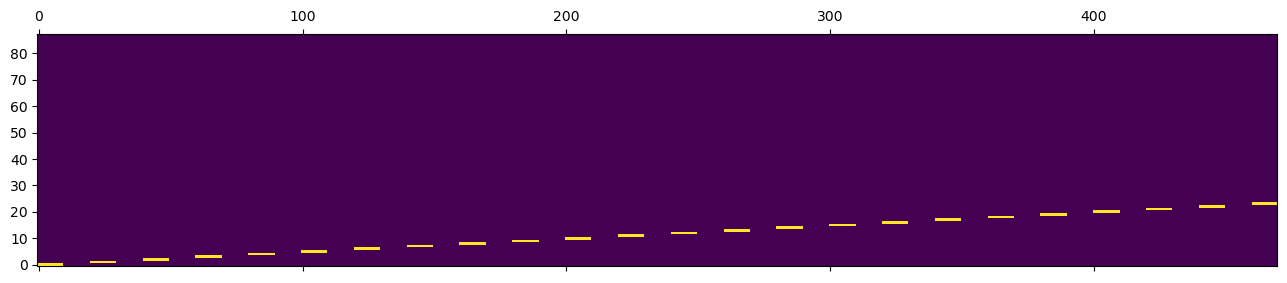

In [7]:
concurrent_notes_list, concurrent_notes_onsets, concurrent_notes_offsets = get_concurrent_notes_from_piano_roll(test_piano_roll, lowest_pitch = 21, min_len = 20)
for item in concurrent_notes_list[:20]:
    print(item)

print(concurrent_notes_list[-1])
test_piano_roll_recon2 =maestro_concurrent_notes_to_piano_roll(concurrent_notes_list, pitch_range = 88, lowest_pitch = 21)
plt.matshow(test_piano_roll_recon[:demo_end_id:demo_interval,:].T, origin = "lower")

# Tutorial: Get the corresponding audio for each segment

In [8]:
import soundfile as sf
from data.data_utils import read_audio_section

N_test_concurrent_notes = len(concurrent_notes_list)
test_wav_segments = []
for i in range(N_test_concurrent_notes):
    start_second = concurrent_notes_onsets[i] / tick_per_second
    end_second = concurrent_notes_offsets[i] / tick_per_second
    if end_second - start_second > 0.0:
        if i < 5:
            print(i, start_second, end_second)
        test_wav_segments.append(read_audio_section(test_wav_path, start_second, end_second)[0])

0 0.0 0.5
1 1.0 1.5
2 2.0 2.5
3 3.0 3.5
4 4.0 4.5


(22050,)


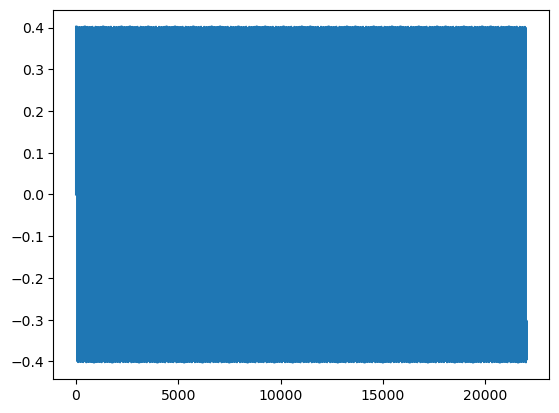

In [9]:
from data.data_utils import play_audio

i_display = 48
_, sr = sf.read(test_wav_path)
print(test_wav_segments[i_display].shape)
play_audio(test_wav_segments[i_display].T, sr)
plt.plot(test_wav_segments[i_display])

# Create single-chord dataset

In [1]:
import os
from data.data_utils import maestro_create_single_chord_dataset_json

template_midi_dir = os.path.join("data","synth")
template_audio_dir = os.path.join("data","synth")
template_save_dir = os.path.join("data","synth_chopped")

maestro_create_single_chord_dataset_json(template_midi_dir, template_audio_dir, template_save_dir, min_len = 20, pitch_range = 88, lowest_pitch = 21, audio_extension = ".wav")

88
piece all_notes_synth finished!


# Tutorial: Write piano roll to midi

MidiFile(type=1, ticks_per_beat=480, tracks=[
  MidiTrack([
    MetaMessage('set_tempo', tempo=500000, time=0),
    MetaMessage('time_signature', numerator=4, denominator=4, clocks_per_click=24, notated_32nd_notes_per_beat=8, time=0),
    MetaMessage('end_of_track', time=1)]),
  MidiTrack([
    Message('program_change', channel=0, program=0, time=0),
    Message('note_on', channel=0, note=77, velocity=62, time=103),
    Message('note_on', channel=0, note=81, velocity=52, time=26),
    Message('note_on', channel=0, note=65, velocity=37, time=10),
    Message('note_on', channel=0, note=77, velocity=0, time=1),
    Message('note_on', channel=0, note=72, velocity=26, time=4),
    Message('note_on', channel=0, note=81, velocity=0, time=9),
    Message('note_on', channel=0, note=65, velocity=0, time=15),
    Message('note_on', channel=0, note=72, velocity=0, time=7),
    Message('note_on', channel=0, note=76, velocity=41, time=577),
    Message('note_on', channel=0, note=79, velocity=52, tim

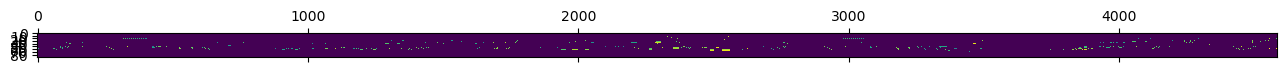

In [1]:
import os
import matplotlib.pyplot as plt
from data.data_utils import maestro_read_midi_to_piano_roll, maestro_piano_roll_to_note_list, maestro_note_list_to_midi

piece_name = "MIDI-Unprocessed_XP_14_R1_2004_04_ORIG_MID--AUDIO_14_R1_2004_06_Track06_wav"
midi_dir = os.path.join("data","midi_no_cc","2004")
midi_path = os.path.join(midi_dir, piece_name+".midi")
save_path = "test_midi_save.midi"

exp_piano_roll, tick_per_sec = maestro_read_midi_to_piano_roll(midi_path)

plt.matshow(exp_piano_roll[::24].T)

exp_note_list = maestro_piano_roll_to_note_list(exp_piano_roll)
maestro_note_list_to_midi(exp_note_list, save_path)